In [2]:
library(dplyr)
library(ggplot2)
library(scales)
library(tidyverse)
library(tidyr)
library(lubridate)
library(cowplot)

In [3]:
epi_final_pat <- read.csv('../data/epi_score_snps_final.csv')[,-1]
pat_pat_adm_data <- read.csv('../data/pat_pat_adm_data.csv')[,-1]


In [4]:
df1 <- merge(epi_final_pat, pat_pat_adm_data, by.x = 'Sample.1', by.y = 'sample', all.x = TRUE)
df1 <- df1 %>% select(!Source)
df2 <- merge(df1, pat_pat_adm_data, by.x = 'Sample.2', by.y = 'sample', all.x = TRUE)

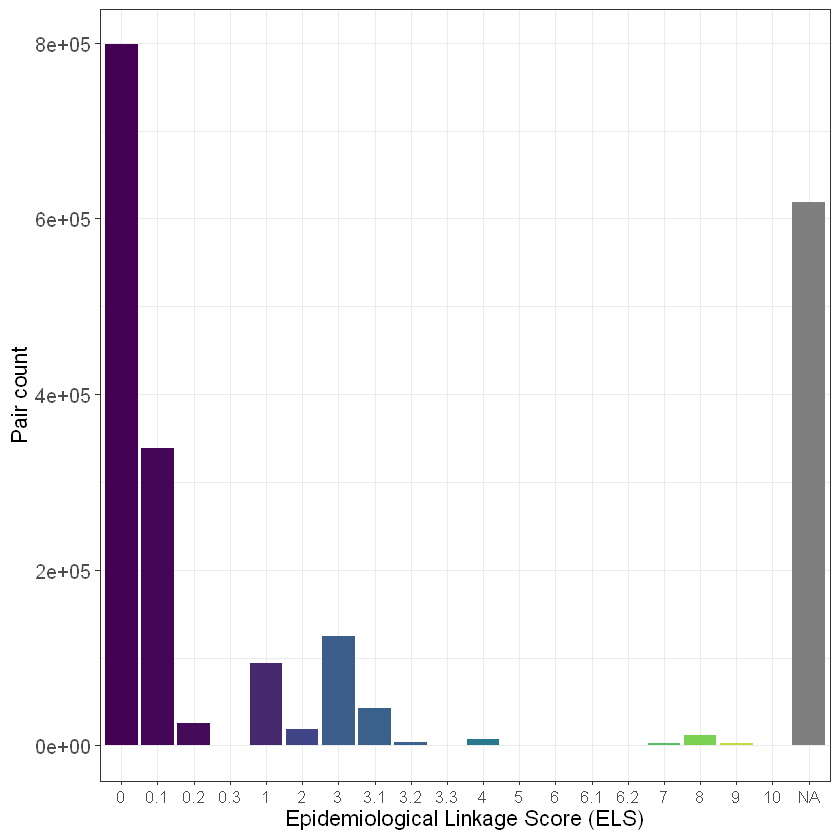

In [9]:
fig4a <- df2 %>% ggplot()+
aes(x=as.factor(epi_score), fill= epi_score)+
geom_bar(stat = 'count') + 
theme_bw()+xlab('Epidemiological Linkage Score (ELS)')+
ylab('Pair count')+
scale_fill_viridis_c()+
theme(legend.position = 'none',
      axis.title.y = element_text(size=13),
      axis.text.y = element_text(size=12),
      axis.title.x = element_text(size=13),
      axis.text.x = element_text(size=10))

fig4a

In [5]:
## Categorical Score
df2 <- epi_final_pat
df2 <- df2 %>% mutate(score_cat = epi_score)
 
df2 <- df2 %>% mutate(score_cat = case_when(epi_score >=8  ~ 'High',
                                             epi_score >=4  ~ 'Medium',
                                              epi_score >=3  ~ 'Low',
                                              epi_score >=0  ~ 'Not-linked'))

df2 <- df2 %>% mutate(score_cat=case_when(Patient.x !='n/a' & Patient.x==Patient.y ~ 'Same Patient',
                                                             TRUE ~ score_cat))
df2 <- df2 %>% mutate(score_cat=case_when(Pat.x !='n/a' & Pat.x==Pat.y ~ 'Same Patient',
                                                             TRUE ~ score_cat))
df2 <- df2 %>% mutate(score_cat = case_when(Hospital.x == Hospital.y & Patient.x == 'n/a' & Patient.y == 'n/a' & contains_same_value == TRUE ~ 'Same Room',
                                         TRUE ~ score_cat))

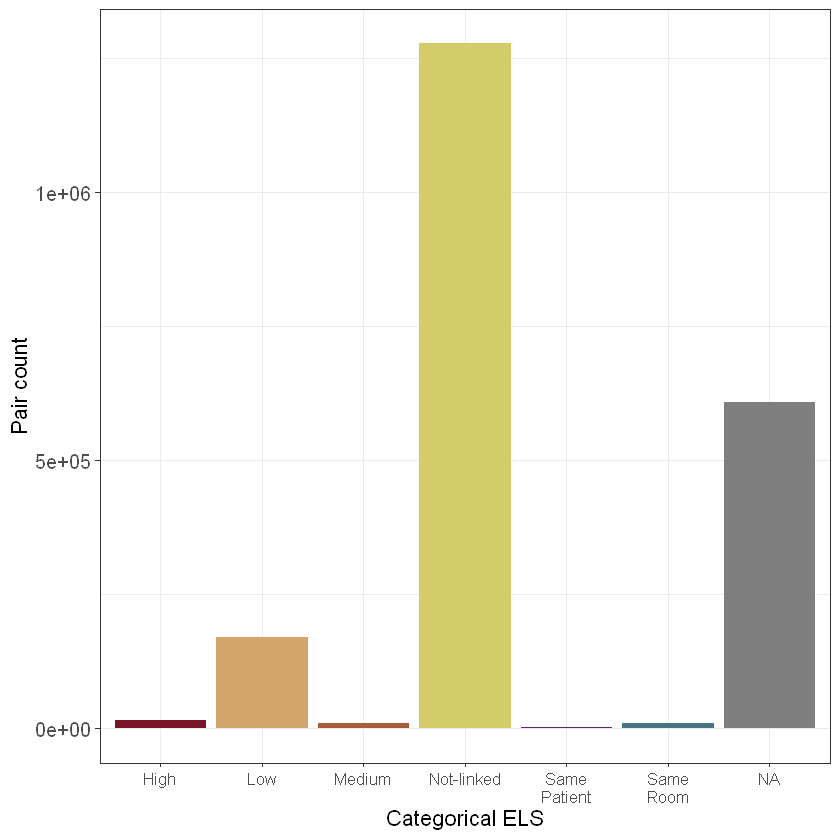

In [12]:
score_cat_colors <- c('High'='#771427','Medium'='#AA5C39','Low'='#D4A56A','Not-linked'='#D4CC6A',
                      'Same Patient'='#672770','Same Room'='#457585', 'NA'='grey')

fig4B <- df2 %>% ggplot()+
aes(x=as.factor(score_cat), fill= score_cat)+
geom_bar(stat = 'count') + 
theme_bw()+xlab('Categorical ELS')+
ylab('Pair count')+
 scale_x_discrete(labels=c('High'='High','Medium'='Medium','Low'='Low','Not-linked'='Not-linked',
                      'Same Patient'='Same\nPatient','Same Room'='Same\nRoom', 'NA'='NA'))+
scale_fill_manual(values= score_cat_colors)+

theme(legend.position = 'none',
      axis.title.y = element_text(size=13),
      axis.text.y = element_text(size=12),
      axis.title.x = element_text(size=13),
      axis.text.x = element_text(size=10))
fig4B

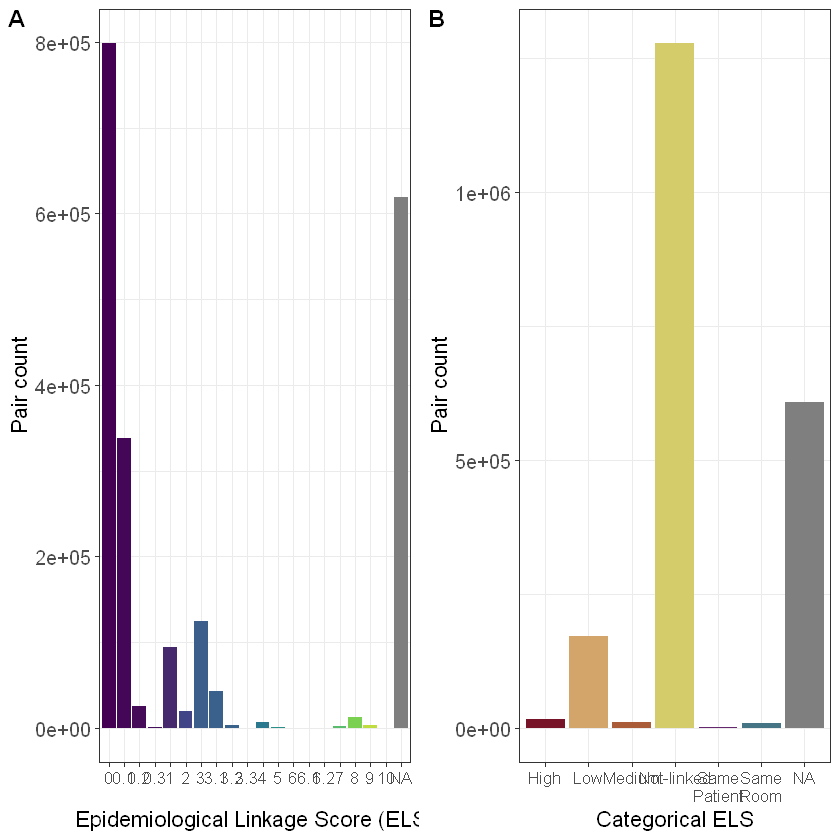

In [13]:
plot_grid(fig4a,fig4B, nrow = 1, labels = c('A', 'B'), align = 'hv')

ggsave('../output/Figure4.png', device='png', dpi=450, width = 11, height=4)